# 연구과제(LinePlot, BarPlot) 풀이

## 준비과정

### [1] 패키지 참조

In [1]:
import sys
import numpy as np
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.unicode_minus"] = False

## 문제1

In [6]:
df1 = read_excel("https://data.hossam.kr/pydata/covid19_active.xlsx", index_col="기준일")
df1

,서울시 일일 확진,전국 일일 확진
기준일,,
2023-05-31,5987.0,24411.0
2023-05-30,3326.0,13529.0
2023-05-29,1393.0,6868.0
2023-05-28,1393.0,6868.0
2023-05-27,4078.0,17796.0
...,...,...
2022-05-05,6645.0,42296.0
2022-05-04,7436.0,49064.0
2022-05-03,8709.0,51131.0


In [12]:
data1 = df1['서울시 일일 확진'].values
print(data1[:5])

[5987. 3326. 1393. 1393. 4078.]


In [13]:
data2 = df1['전국 일일 확진'].values
print(data1[:5])

[5987. 3326. 1393. 1393. 4078.]


In [19]:
step = 30
x = list(range(0, len(df1.index), step))
print(x)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]


In [22]:
xticks = [v.strftime("%y/%m/%d") for i, v in enumerate(df1.index) if i % step == 0 ]
print(xticks)

['23/05/31', '23/05/01', '23/04/01', '23/03/02', '23/01/31', '23/01/01', '22/12/02', '22/11/02', '22/10/03', '22/09/03', '22/08/04', '22/07/05', '22/06/05', '22/05/06']


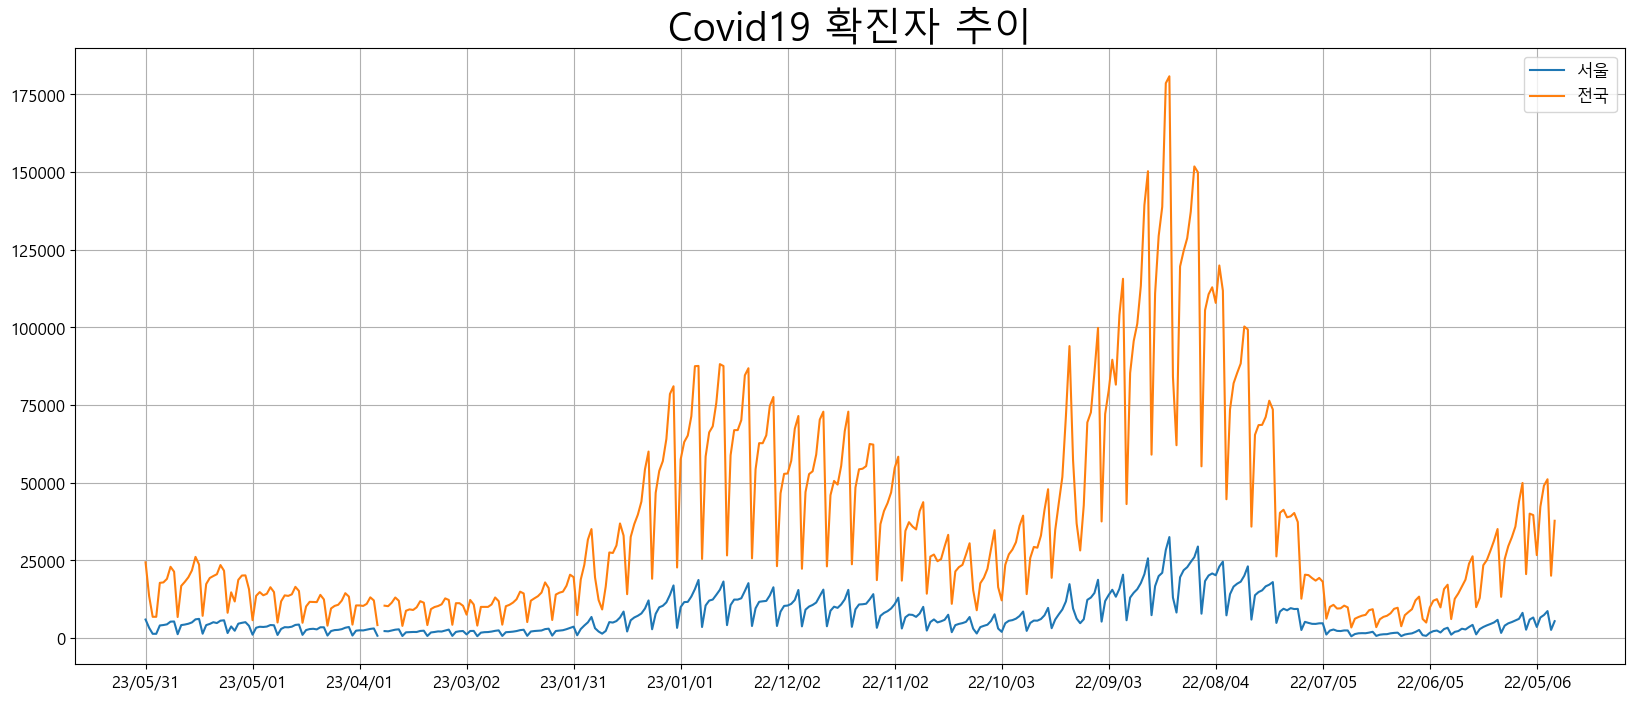

In [27]:
plt.figure(figsize=(20, 8))
plt.title("Covid19 확진자 추이", fontdict={"size": 28})
plt.plot(data1, label="서울")
plt.plot(data2, label="전국")
plt.xticks(x, xticks)
plt.grid()
plt.legend()
plt.show()
plt.close()

## 문제2

In [28]:
df2 = read_excel("https://data.hossam.kr/pydata/bitcoin.xlsx", index_col='날짜')
df2

,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...
2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199


In [29]:
start = list(df2['시가'].values)

print(len(start))
print(start[:5])

760
[37294.3, 36687.7, 37555.7, 39191.4, 36841.2]


In [30]:
end = list(df2['종가'].values)

print(len(end))
print(end[:5])

760
[36687.6, 37555.8, 39187.3, 36851.3, 35520.0]


In [31]:
step = 20
x = np.arange(0, len(start), step)

print(len(x))
print(x)

38
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700
 720 740]


In [32]:
xticks = [v.strftime("%y/%m/%d") for i, v in enumerate(df2.index) if i % step == 0 ]

print(len(xticks))
print(xticks)

38
['21/06/01', '21/06/21', '21/07/11', '21/07/31', '21/08/20', '21/09/09', '21/09/29', '21/10/19', '21/11/08', '21/11/28', '21/12/18', '22/01/07', '22/01/27', '22/02/16', '22/03/08', '22/03/28', '22/04/17', '22/05/07', '22/05/27', '22/06/16', '22/07/06', '22/07/26', '22/08/15', '22/09/04', '22/09/24', '22/10/14', '22/11/03', '22/11/23', '22/12/13', '23/01/02', '23/01/22', '23/02/11', '23/03/03', '23/03/23', '23/04/12', '23/05/02', '23/05/22', '23/06/11']


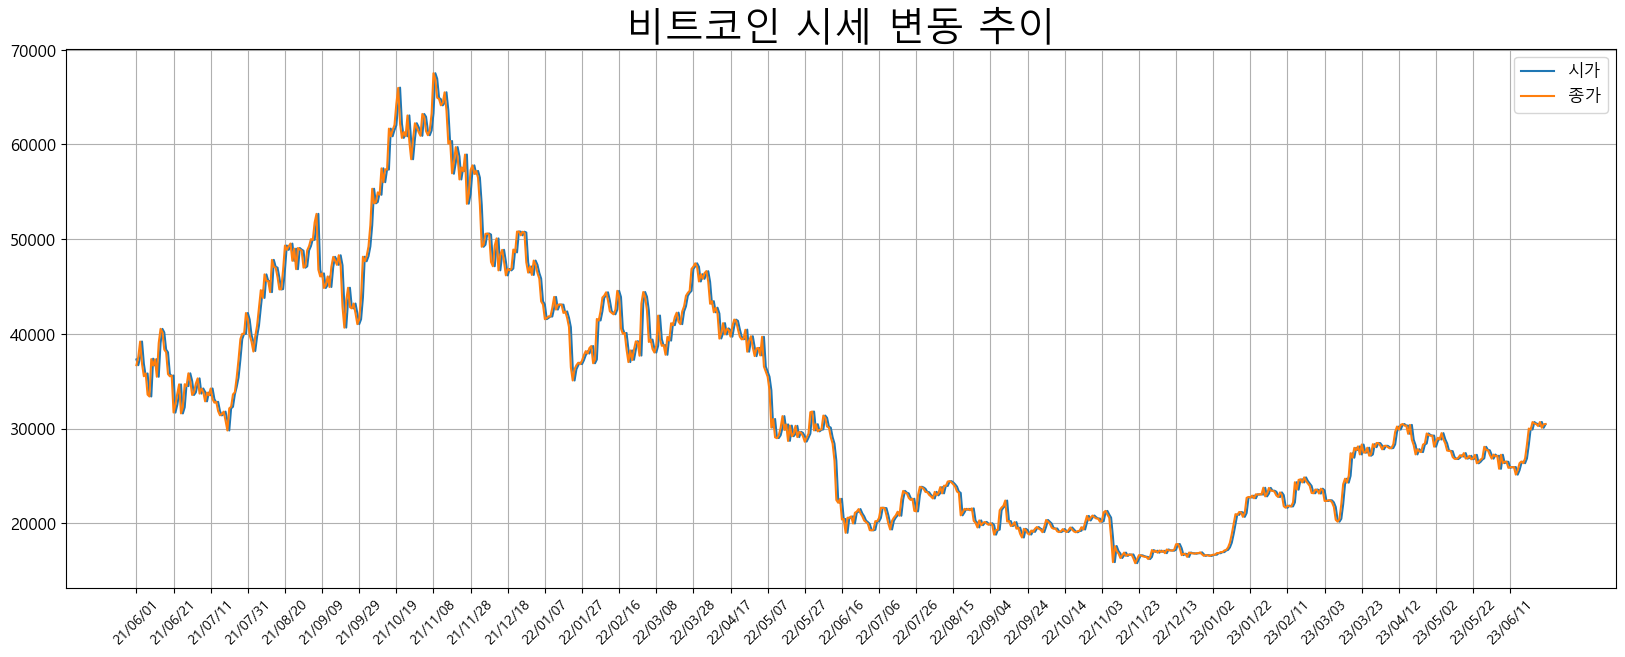

In [35]:
plt.figure(figsize=(20, 7))

plt.title("비트코인 시세 변동 추이", fontdict={"size": 28})
plt.plot(start, label='시가')
plt.plot(end, label='종가')
plt.xticks(x, xticks, rotation=45, fontdict={"size": 10})
plt.legend()
plt.grid()
plt.show()
plt.close()

## 문제3

In [36]:
df3 = read_excel("https://data.hossam.kr/pydata/senior_lsf.xlsx", index_col='지역명')
df3

,복지시설
지역명,
Jongno-gu,61
Jung-gu,53
Yongsan-gu,110
Seongdong-gu,155
Gwangjin-gu,103
Dongdaemun-gu,146
Jungnang-gu,128
Seongbuk-gu,158
Gangbuk-gu,111


In [37]:
df3_sort = df3.sort_values('복지시설', ascending=False)
df3_sort

,복지시설
지역명,
Nowon-gu,252
Gangseo-gu,215
Yeongdeungpo-gu,208
Guro-gu,192
Yangcheon-gu,192
Gangnam-gu,184
Songpa-gu,173
Mapo-gu,160
Seongbuk-gu,158


In [38]:
df3_top10 = df3_sort.head(10)
df3_top10

,복지시설
지역명,
Nowon-gu,252
Gangseo-gu,215
Yeongdeungpo-gu,208
Guro-gu,192
Yangcheon-gu,192
Gangnam-gu,184
Songpa-gu,173
Mapo-gu,160
Seongbuk-gu,158


In [39]:
y = df3_top10['복지시설'].values
y

array([252, 215, 208, 192, 192, 184, 173, 160, 158, 155], dtype=int64)

In [40]:
xticks = df3_top10.index
xticks

Index(['Nowon-gu', 'Gangseo-gu', 'Yeongdeungpo-gu', 'Guro-gu', 'Yangcheon-gu',
       'Gangnam-gu', 'Songpa-gu', 'Mapo-gu', 'Seongbuk-gu', 'Seongdong-gu'],
      dtype='object', name='지역명')

In [41]:
x = np.arange(0, len(xticks))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

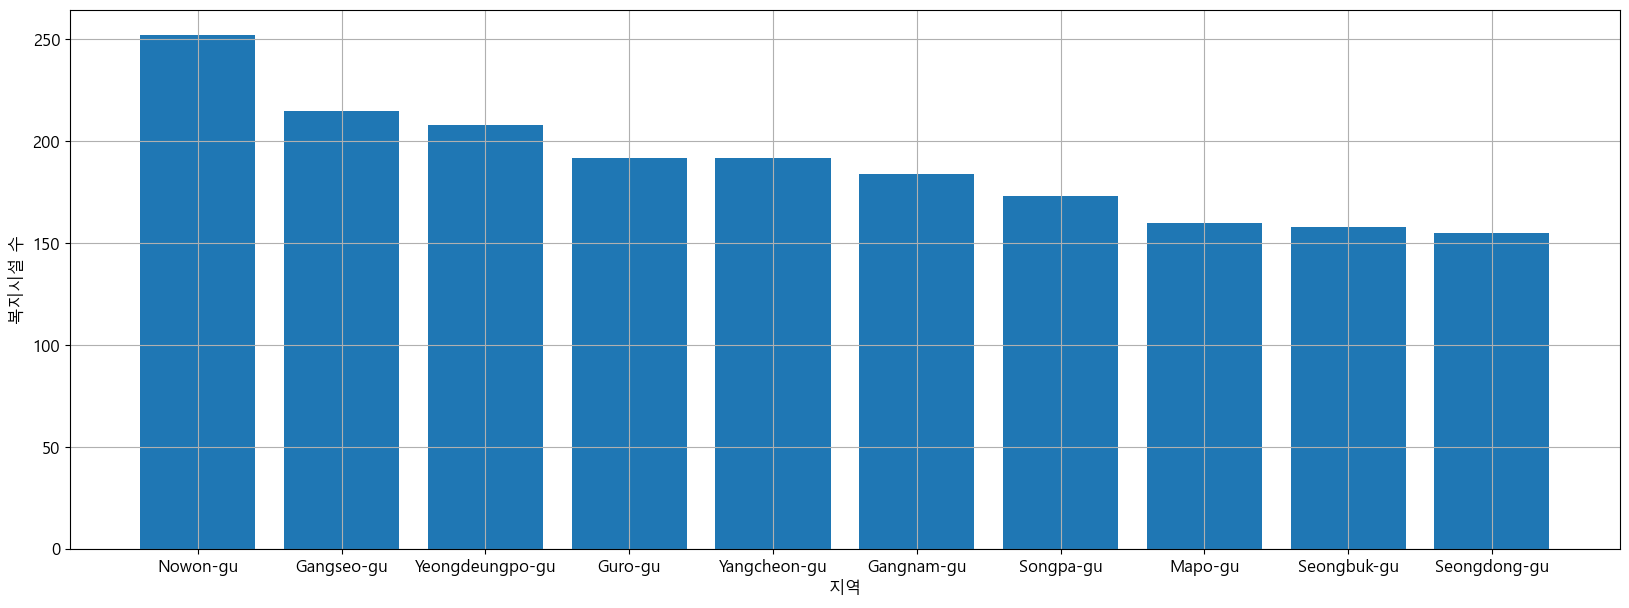

In [42]:
plt.figure(figsize=(20, 7))
plt.bar(x, y)
plt.xlabel('지역')
plt.ylabel('복지시설 수')
plt.xticks(x, xticks)
plt.grid()
plt.show()
plt.close()

## 문제 4

In [43]:
df4 = read_excel("https://data.hossam.kr/pydata/city_people.xlsx")
df4

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [44]:
df4_year = df4.query("연도 == 2015 or 연도 == 2010")
df4_year

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [47]:
df4_year = df4.loc[(df4["연도"] == 2015) | (df4["연도"] == 2010)]
df4_year

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [48]:
df4_pivot = pivot_table(df4_year, index='도시', columns='연도', values='인구')
df4_pivot

연도,2010,2015
도시,,
부산,3393191.0,3448737.0
서울,9631482.0,9904312.0
인천,2632035.0,2890451.0


In [49]:
x = np.array(range(0, len(df4_pivot.index)))
x

array([0, 1, 2])

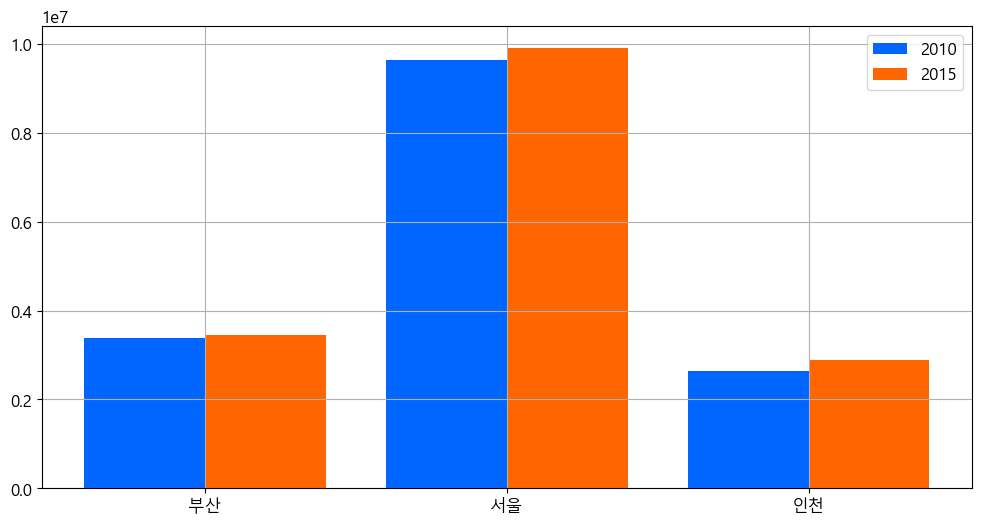

In [50]:
plt.figure()

# 각 막대의 색상을 단색으로 지정
plt.bar(x-0.2, df4_pivot[2010], color='#0066ff', label="2010", width=0.4)
plt.bar(x+0.2, df4_pivot[2015], color='#ff6600', label="2015", width=0.4)

plt.grid()
plt.legend()
plt.xticks(x, df4_pivot.index)

plt.show()
plt.close()

## 문제 5

In [52]:
df5 = read_excel("https://data.hossam.kr/pydata/jobs_by_scale.xlsx", index_col='종사자규모별')
df5

,2015,2016
종사자규모별,,
1~4명,553.5,576.7
5~9명,211.6,216.8
10~29명,194.7,195.5
30~49명,227.4,227.4
50~99명,152.8,155.7
100~199명,221.9,220.6
200~299명,80.9,81.0
300~999명,100.5,99.3
1000명 이상,557.6,549.7


In [56]:
x = np.arange(0, len(df5.index))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

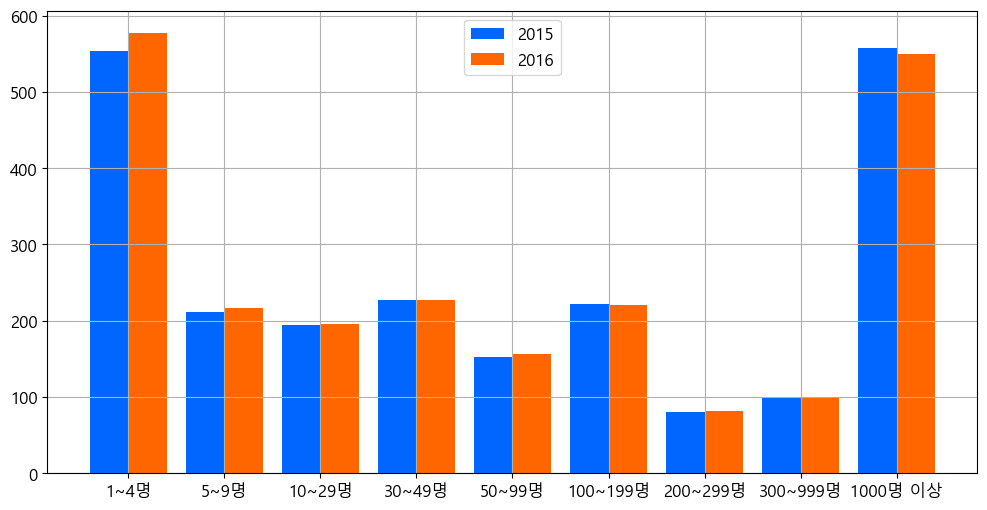

In [57]:
plt.figure()

# 각 막대의 색상을 단색으로 지정
plt.bar(x-0.2, df5[2015], color='#0066ff', label="2015", width=0.4)
plt.bar(x+0.2, df5[2016], color='#ff6600', label="2016", width=0.4)

plt.grid()
plt.legend()
plt.xticks(x, df5.index)

plt.show()
plt.close()